# Random Graph State

This code constructs a graph state with random controlled unitary grates rather than `CNOT` or `CZ` gates for entangling qubits. This gives a more general model of entanglement. 

Circuit:
      ┌──────────────────────────────────────────────────────────┐   ┌──────────────────────────────────────────────────────────┐   ┌──────────────────────────────────────────────────────────┐   ┌────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐   ┌────────────────────────────────────────────────────────┐   ┌──────────────────────────────────────────────────────────┐
0: ────@──────────────────────────────────────────────────────────────@──────────────────────────────────────────────────────────────@──────────────────────────────────────────────────────────────@────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

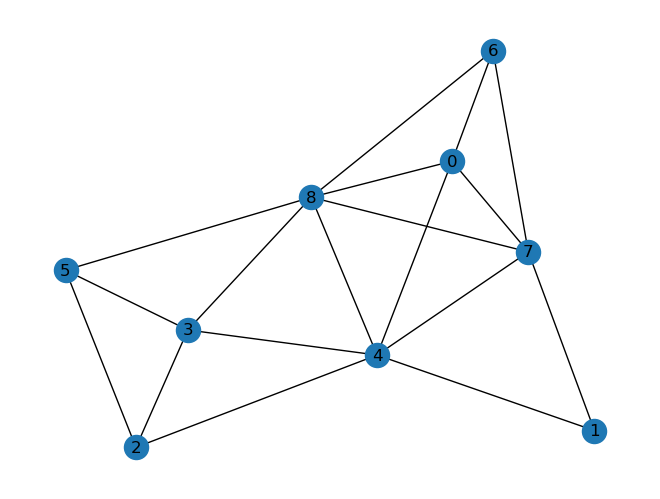

In [1]:
import random
import networkx as nx
import cirq

# Define the number of qubits
num_qubits = 9

# Generate a random graph with num_qubits nodes
graph = nx.fast_gnp_random_graph(num_qubits, 0.5)

# Initialize the circuit with the given qubits
qubits = [cirq.LineQubit(i) for i in range(num_qubits)]
circuit = cirq.Circuit()

# Apply random controlled unitary gates to each edge
for edge in graph.edges():
    control_qubit, target_qubit = qubits[edge[0]], qubits[edge[1]]
    
    # Generate a random unitary matrix
    random_unitary = cirq.testing.random_unitary(2)
    
    # Apply the controlled random unitary gate to the circuit
    circuit.append(cirq.ControlledGate(cirq.MatrixGate(random_unitary)).on(control_qubit, target_qubit))

# Print the circuit and the graph
print("Circuit:")
print(circuit)
print("Graph:")
nx.draw(graph, with_labels=True)


This code also constructs a graph state with random controlled unitary grates rather than `CNOT` or `CZ` gates for entangling qubits. This gives a more general model of entanglement. 

In [2]:
import cirq
import numpy as np
import networkx as nx

def graph_state_circuit(num_qubits):
    """Returns a graph state circuit on num_qubits qubits"""
    # Generate a random graph with num_qubits nodes
    graph = nx.fast_gnp_random_graph(num_qubits, 0.5)

    # Initialize the circuit with the given qubits
    qubits = [cirq.LineQubit(i) for i in range(num_qubits)]
    circuit = cirq.Circuit()

    # Apply Hadamard gates to all qubits
    circuit.append(cirq.H.on_each(qubits))

    # Apply random controlled unitary gates to each edge
    for edge in graph.edges():
        control_qubit, target_qubit = qubits[edge[0]], qubits[edge[1]]

        # Generate a random unitary matrix
        random_unitary = cirq.testing.random_unitary(2)

        # Apply the controlled random unitary gate to the circuit
        circuit.append(cirq.ControlledGate(cirq.MatrixGate(random_unitary)).on(control_qubit, target_qubit))

    return circuit


In [3]:
num_qubits = 9
circuit = graph_state_circuit(num_qubits)
circuit

┌──────────────────────────────────────────────────────────┐   ┌──────────────────────────────────────────────────────────┐   ┌───────────────────────────────────────────────────────────────────────────────────────┐                                                                   ┌──────────────────────────────────────────────────────────┐   ┌──────────────────────────────────────────────────────────┐
0: ───H───@───────────────────────────────@────────────────────────────────@──────────────────────────────────────────────────────────────@──────────────────────────────────────────────────────────────@────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
          │                               │                                │                                                              │                                                              │
1: ───H───┼───────────────────────────────┼────────────────────────────────┼──────────────────────────────────────────────────────────────┼────────────────────────────@─────────────────────────────────┼────────────────────────────@───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
          │                               │                                │                                                              │                            │                                 │                            │
          ┌                           ┐   │                                │                                                              │                            │                                 │                            │
2: ───H───│-0.842+0.33j  -0.04 +0.426j│───┼────────────────────────────────┼────────────────────────────@─────────────────────────────────┼────────────────────────────┼─────────────────────────────────┼────────────────────────────┼────────────────────────────@──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
          │-0.38 -0.195j  0.732-0.531j│   │                                │                            │                                 │                            │                                 │                            │                            │
          └                           ┘   │                                │                            │                                 │                            │                                 │                            │                            │
                                          │                                │                            │                                 │                            │                                 │                            │                            │
                                          ┌                           ┐    │                            ┌                           ┐     │                            │                                 │                            │                            │
3: ───H───────────────────────────────────│ 0.661+0.26j  -0.439-0.55j │────┼────────────────────────────│ 0.156+0.607j -0.408+0.664j│─────┼────────────────────────────┼─────────────────────────────────┼────────────────────────────┼────────────────────────────┼────────────────────────────────@─────────────────────────────────────────────